# Shallow Network Parameter Matching

Match parameter amounts in shallow networks to k-trees

In [1]:
from custompackage.load_data import *
from custompackage.load_architecture import *
from custompackage.traintestloop import *


import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torchvision
from torchvision import transforms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib
import matplotlib.pyplot as plt
from torch.optim.optimizer import required
from torch.utils.data.dataset import random_split
import scipy
import os
import glob
import pandas as pd
from hyperopt import hp, tpe, fmin, Trials
import pickle

% matplotlib inline

### Visualize FCNN code, see if I can modify it slightly. 

Hidden_size is a parameter that can be set with "repeats" or "trees" param.

Try the simple_fcnn model in the test space...

In [2]:
# Test space for networks
# Select Class Set
class_set = 3

# Initialize settings
bs = 256
weighting = 'paired'
trials = 10
epochs = 2000
# trees_set = [1,2,4,8,16,32]
trees_set = [8]


classes = np.load('./results/20200511/classes.npy', allow_pickle=True)

if class_set == 0:
    classes = classes[0:2] # mnist fmnist
elif class_set == 1:
    classes = classes[2:4] # kmnist emnist
elif class_set == 2:
    classes = classes[4:6] # svhn usps
else:
    classes = classes[6].reshape(1,-1)


loss = np.zeros((len(classes), trials, len(trees_set)))
acc = np.zeros((len(classes), trials, len(trees_set)))

    
for j, (t1, t2, ds) in enumerate(classes):
    print(t1, t2, ds)
    trainloaders, validloaders, testloader = dataset_weighted_split_all(bs, t1, t2, weighting, trials, ds, permute=False)
    input_size = trainloaders[0].dataset.tensors[0][0].shape[0]
    for i in range(trials):
        for k, trees in enumerate(trees_set):
            print(j, i, k)
#             model = ktree_gen(ds=ds, Repeats=trees, Padded=False).cuda()
            model = simple_fcnn(input_size, input_size, 1).cuda()
            
#             loss_curve, acc_curve, loss[j,i,k], acc[j,i,k], model_t = train_test_ktree(model, trainloaders[i],
#                                                                                   testloader, epochs = epochs, randorder=False)
            loss_curve, acc_curve, loss[j,i], acc[j,i], model_t = train_test_fc(model, trainloaders[i],
                                              validloaders[i], epochs = epochs)

            break
        break
    break
    
#             np.save('./results/20200504/k_tree_acc_'+str(class_set)+'.npy', acc)
#             np.save('./results/20200504/k_tree_loss_'+str(class_set)+'.npy', loss)


3 5 cifar10
Files already downloaded and verified
Files already downloaded and verified
0 0 0
Finished Training, 2000 epochs
Accuracy of the network on the 10000 test images: 54 %


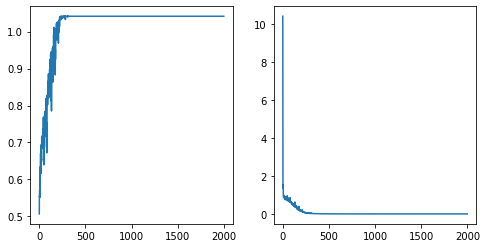

In [3]:
x = np.arange(epochs)

a = np.array(acc_curve)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(acc_curve)
ax2.plot(loss_curve)

In [46]:
print(classes)

[[3 5 'cifar10']]
